## Building and Evaluating Predictive Models

**Classifiers**
- Logistic Regression
- Support vector machine
- Neural networks
- Random forest

**Which Classifier is better?**
 - Performance Matrics
     - Accuracy
     - Precision
     - Recall
 
 - **Accuracy** - Compare predicted output with actual output. 
     - Accuracy = Correct / Total Count
     
 - **Precision & Recall**: 
 
 **Confution Metrix**
 
| | Predicted Negtive  |  Predicted Possitive |
|:---:|:---:|:---:|
|Actual Negative | True Negative (TN) | False Positive (FP)  |
|Actual Possitve | False Negative (FN)| True Positive (TP)   |
  
   **Precision**: What fraction of positive predictions are correct?
           TP / Total Positive Prediction = TP / TP + FP
           
   **Recall** : What fraction of positive cases you predicted correctly?
           TP / Total Positive Cases = TP / TP + FN
           
 
 
 ### Classifier Evaluation 
 
 ***Train Test Split***
   - Take the training data and split it into training and test data
   
   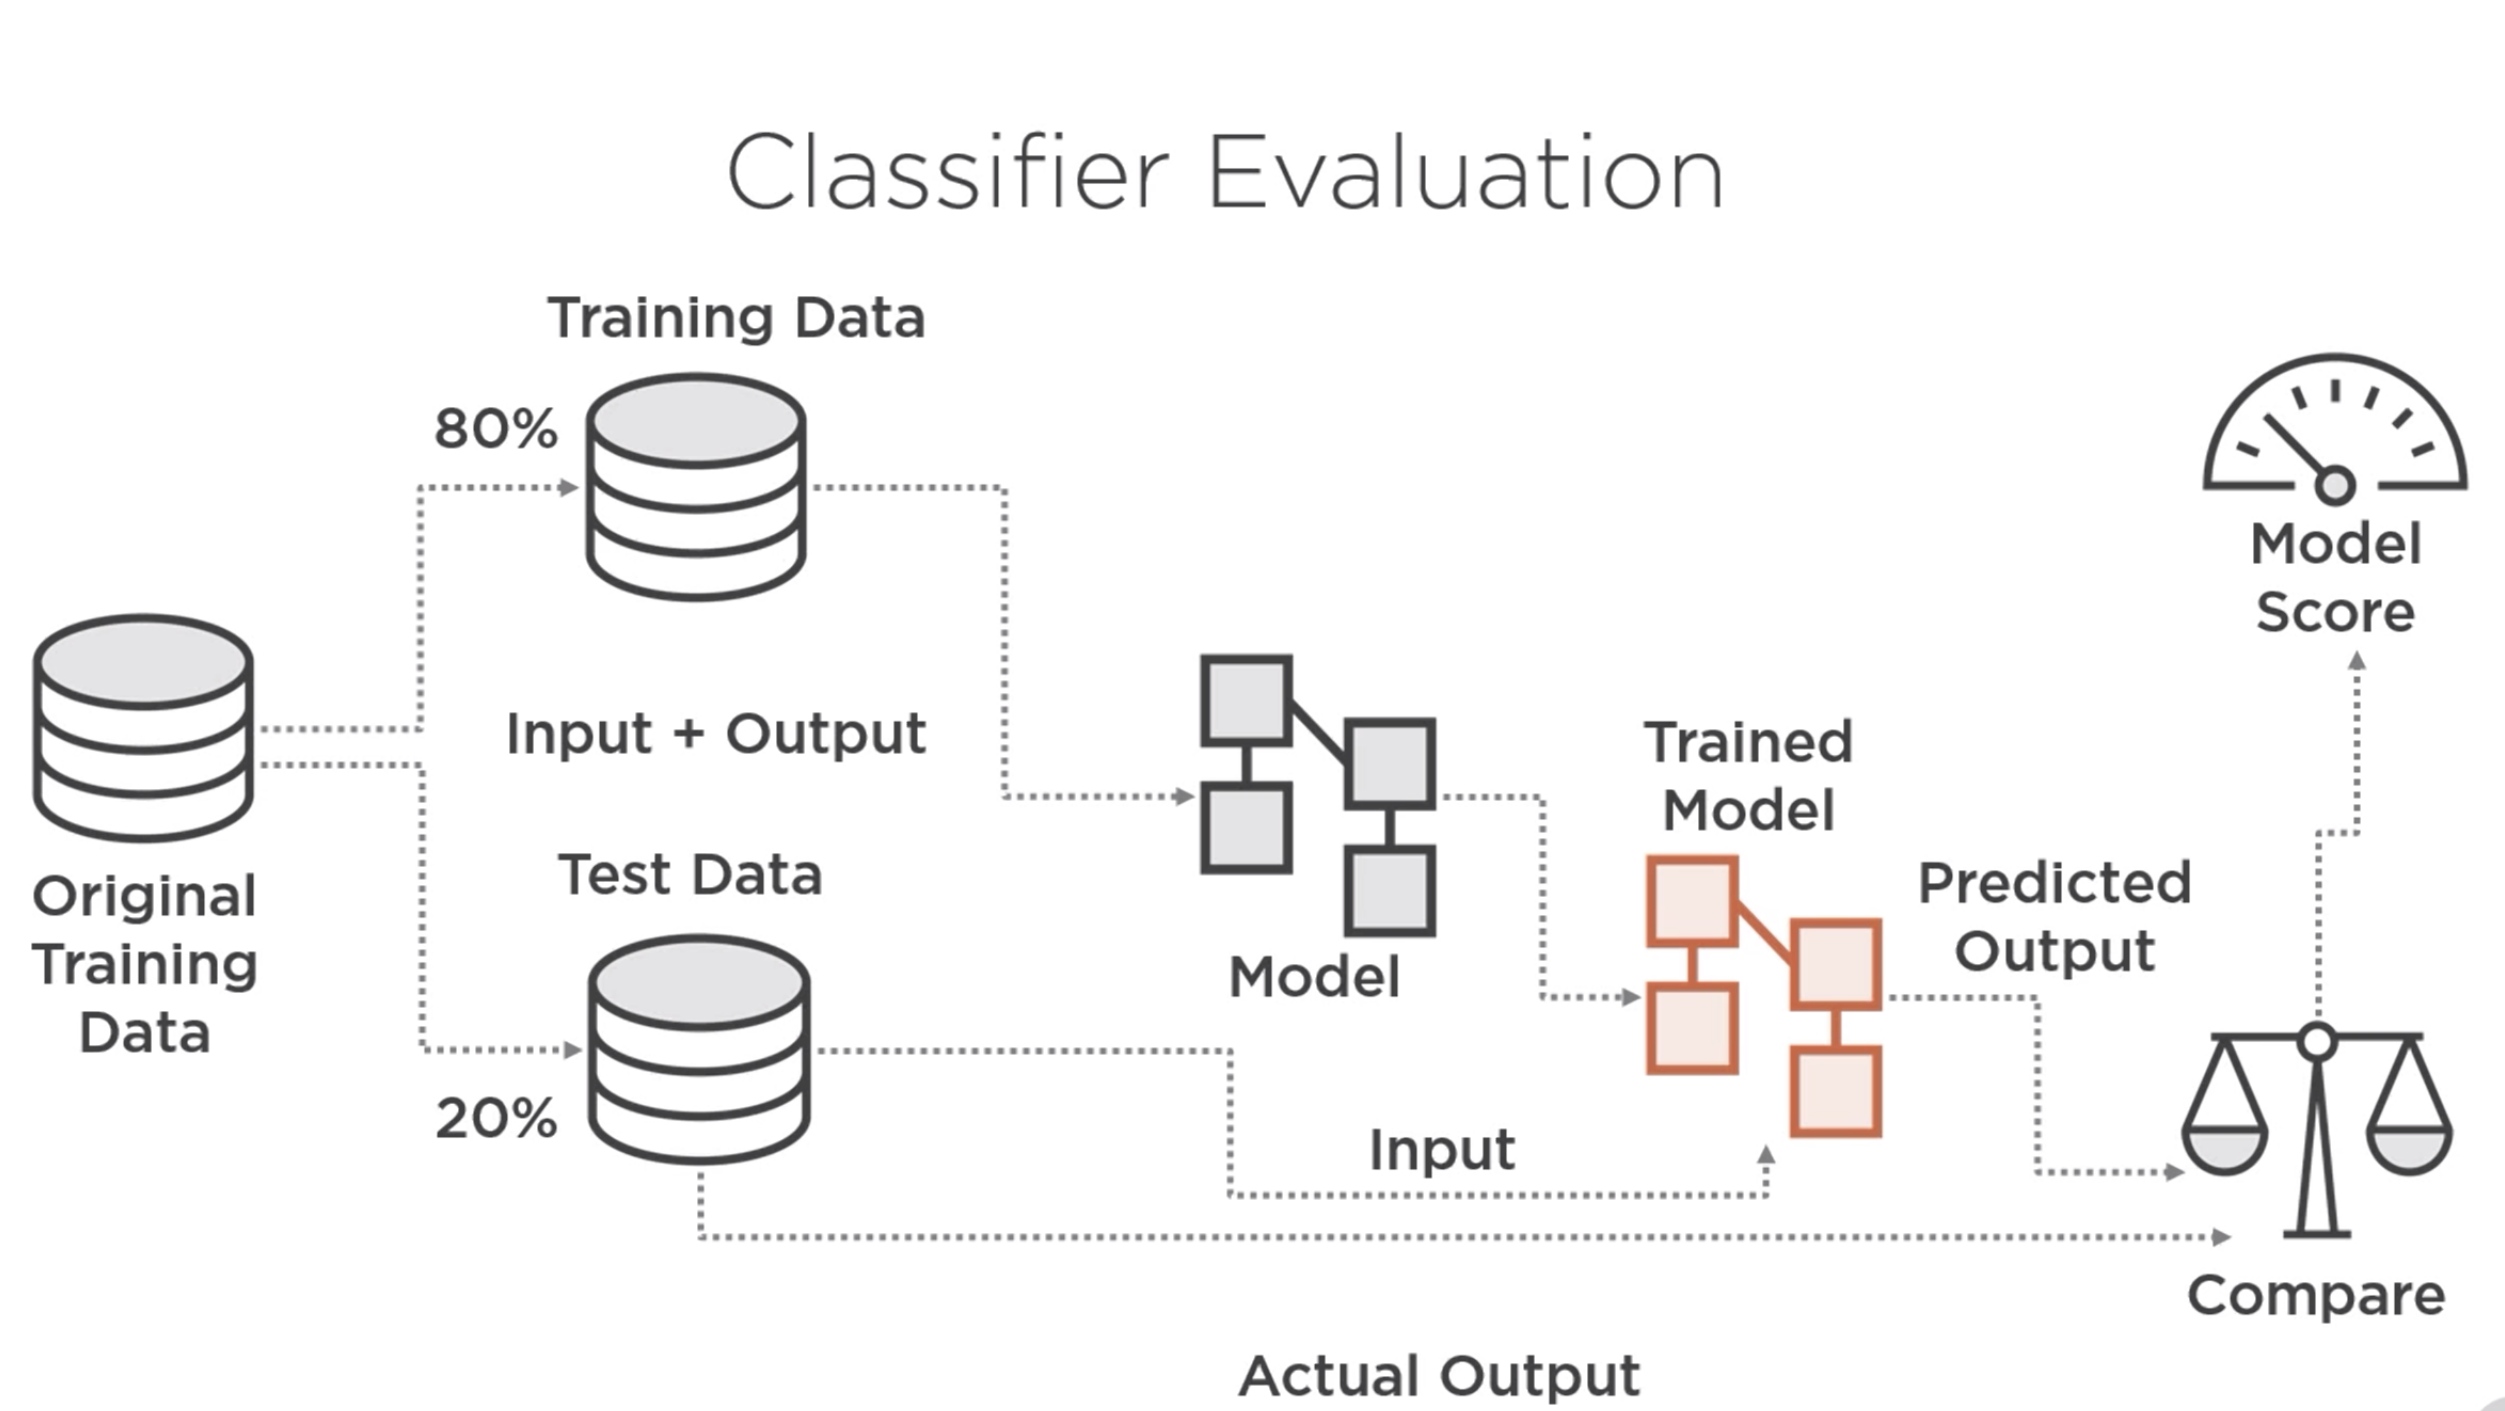
   



## Baseline Model

- First Step - Create baseline Model which does not use the machine leanring at all - It is a best practice to do that. It will help to compare our machine learning model. If Machine leanring model gives the better result then it makes sense to build machine learning model other wise it does not make sense at all. 

#### Baseline Model for classification 

- Always give the output as majority class

|Class | Count |
|:---:|:---:|
|1|60|
|0|40|

If training data set has the majority class 60 percent as 1. Then our model will always return class 1 as a result.
Baseline Model Accuracy = 60 / (60+40) = 0.6  = 60%

Predictive model should have better performance than baseline otherwise it does not make sense to build the machine learning model. 



### Building Baseline Models

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# set the path of processed data
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
train_data_path = os.path.join(processed_data_path, 'train.csv')
test_data_path = os.path.join(processed_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_data_path, index_col='PassengerId')
test_df = pd.read_csv(test_data_path, index_col='PassengerId')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 33 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-null int64
Title_Mrs             891 non-

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 33 columns):
Survived              418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
IsMale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 n

### Data Preparation 

In [10]:
X = train_df.loc[:,'Age':].as_matrix().astype('float')
y = train_df['Survived'].ravel()

#ravel is numpy fuction which creates flaten one dimentional array
# as_matix creates a matrix and astype float change datatype of all the value to float


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
print(X.shape, y.shape)

(891, 32) (891,)


 **As a best practice we use upper case letter for the Matrix and lower case letter for the one dimentional array.**

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 32) (712,)
(179, 32) (179,)


In [14]:
# Average survival in train and test 
print(f"Mean Survival in train : {np.mean(y_train)}")
print(f"Mean Survival in test : {np.mean(y_test)}")      

Mean Survival in train : 0.38342696629213485
Mean Survival in test : 0.3854748603351955


- First observation: Survival rate in both train and test data are almost same that means training and test data. We want positive cases to be distributed evenly in both trainig and test data. 
- Second obeservation: Only 39 % of data are positive cases and 61% are the negative classes. In this scenario 39 vs 61 is still good scenario however in some case like marketing - Attract, Engage and Convert ratio can be very small. 2-3% cutomer can be attracted. This highly imbalance problem has different approach to build the model.
### Explore imbalance problem on own - Important

### Baseline model creation

In [15]:
import sklearn

In [16]:
sklearn.__version__

'0.21.3'

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
# create Model
model_dummy = DummyClassifier(strategy='most_frequent', random_state=0)

# Most frequest will output the majority class. 

In [19]:
# train model
model_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [20]:
print(f"Score for baseline Model: {model_dummy.score(X_test, y_test)}")

Score for baseline Model: 0.6145251396648045


In [21]:
# performance matrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [23]:
print(f"Accurancy for baseline model: {accuracy_score(y_test, model_dummy.predict(X_test))}")

Accurancy for baseline model: 0.6145251396648045


In [24]:
print(f"Confusion Matrix for baseline model: {confusion_matrix(y_test, model_dummy.predict(X_test))}")

Confusion Matrix for baseline model: [[110   0]
 [ 69   0]]


In [26]:
print(f"Precision for baseline model: {precision_score(y_test, model_dummy.predict(X_test))}")
print(f"Recall for baseline model: {recall_score(y_test, model_dummy.predict(X_test))}")

Precision for baseline model: 0.0
Recall for baseline model: 0.0


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
